# Homework 3

Henrique Magalhaes Rio


DSCI 320


10/26/2020


In [3]:
import matplotlib.pyplot as plt

import math

import numpy as np
from mpl_toolkits import mplot3d

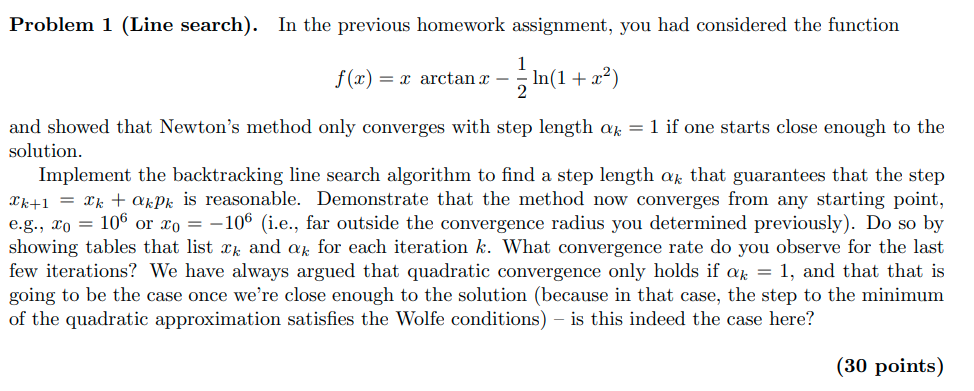

In [8]:
def f(x):
    return x*math.atan(x)-(1/2*np.log(1+x**2))


def gradf(x):
    return math.atan(x)

def grad2f(x):
    return 1/(x**2+1)
def invgrad2f(x):
    return math.sqrt(1/x-1)


def stepl(xk,pk):
    alpha=1
    rho=0.5
    c=0.45
    while((not(f(xk+alpha*pk)<= f(xk)+c*alpha*(gradf(xk)*pk)).any())):
        alpha=rho*alpha
    return alpha
    
def newton(x0):
    xk=x0
    for i in range(1000):
        pk=-1/grad2f(xk)*gradf(xk)
        
        alphak=stepl(xk,pk)
       
        #print(alphak)
        
        xk=xk+alphak*pk
        print('Iteration= ',i,'Alpha_k= ',alphak,'xk= ',xk)
        
        if(f(xk)==0):
            return xk;
        
        






In [57]:
newton(111)

Iteration=  0 Alpha_k=  0.0078125 xk=  -39.34645572545466
Iteration=  1 Alpha_k=  0.015625 xk=  -1.9398050190952247
Iteration=  2 Alpha_k=  0.25 xk=  -0.6361988887921921
Iteration=  3 Alpha_k=  0.5 xk=  -0.2382250982424592
Iteration=  4 Alpha_k=  1 xk=  0.008913151980743855
Iteration=  5 Alpha_k=  1 xk=  -4.720584502546782e-07
Iteration=  6 Alpha_k=  1 xk=  7.019785550370014e-20
Iteration=  7 Alpha_k=  1 xk=  0.0


0.0

Yes, it does appear to hold as we get close to the solution, $Alpha_k=1 and looking at the Xk's we can see that is quadratic.

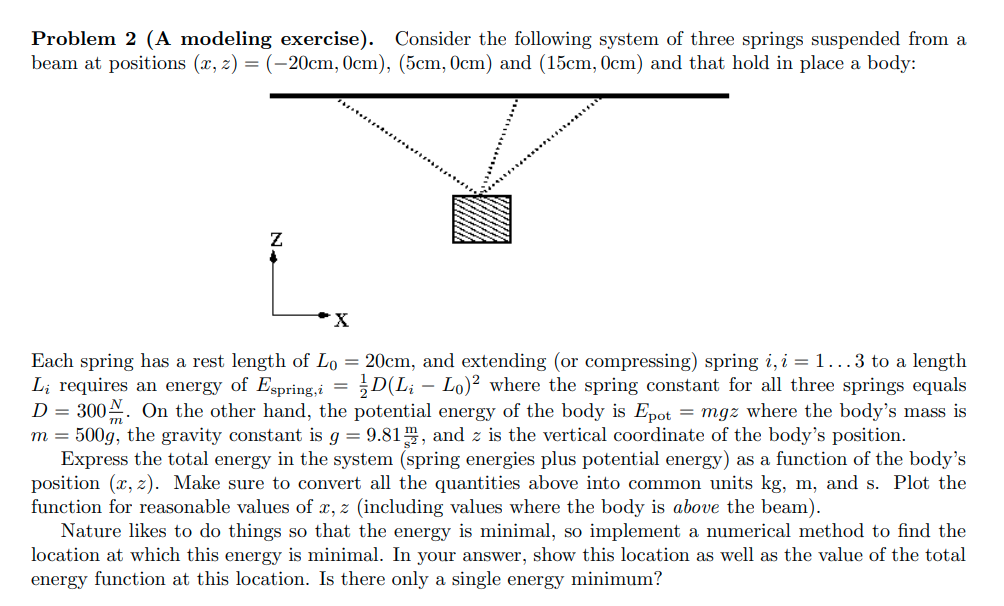

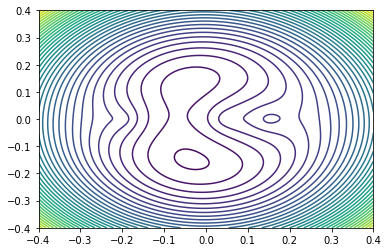

In [5]:
m=0.5
d=300
l0=0.20
g=9.81

def E(x,z):
    l1 = np.sqrt((x+0.2)**2+z**2)
    l2 = np.sqrt((x-0.05)**2+z**2)
    l3 = np.sqrt((x-0.15)**2+z**2)
    e1 = 0.5*d*(l1-l0)**2
    e2 = 0.5*d*(l2-l0)**2
    e3 = 0.5*d*(l3-l0)**2
    
    ep = m*g*z
    
    return e1+e2+e3+ep

x=np.linspace(-0.4,0.4,800)
z=np.linspace(-0.4,0.4,800)

X,Y = np.meshgrid(x,z)

Z= E(X,Y)

fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z,35)


In [6]:
def gradf(x,z):
    l1=(2*(x+0.2)*(np.sqrt((x+0.2)**2+z**2)-0.2))/np.sqrt((x+0.2)**2+z**2)
    l2=(2*(x-0.15)*(np.sqrt((x-0.15)**2+z**2)-0.2))/np.sqrt((x-0.15)**2+z**2)
    l3=(2*(x-0.05)*(np.sqrt((x-0.05)**2+z**2)-0.2))/np.sqrt((x-0.05)**2+z**2)
    
    r1=z*(2-0.4/np.sqrt(x**2+0.4*x+z**2+0.04))
    r2=z*(2-0.4/np.sqrt(x**2-0.3*x+z**2+0.0225))
    r3=z*(2-0.4/np.sqrt(x**2-0.1*x+z**2+0.0225))
    r4=m+g
    
    return np.array([[l1+l2+l3],[r1+r2+r3+r4]])

def bfgs(x1,x2):
    xk=np.array([[x1],[x2]])
    hk=np.identity(2)
    for i in range(700):
        pk=-hk.dot(gradf(xk[0][0],xk[1][0]))
        alphak=1
        new_xk= xk+ alphak*pk
        if(np.linalg.norm(gradf(xk[0][0],xk[1][0]))<0.0001):
            return print('Xk=',xk,'it took Iterations',i)
        
        
       
        sk=alphak*pk
        yk=gradf(new_xk[0][0],new_xk[1][0])-gradf(xk[0][0],xk[1][0])
        
        rhok=1/(sk.transpose().dot(yk))
        h1=np.identity(2)-rhok*sk.dot(np.transpose(yk))
        h2=np.identity(2)-rhok*yk.dot(np.transpose(sk))                            
        hk=h1.dot(hk.dot(h2))+rhok*sk.dot(np.transpose(sk))
        
        xk=new_xk
        
        
        
        
    return xk





    

In [7]:
bfgs(0.2,0.3)

Xk= [[-2.22656169e-05]
 [-1.91756807e+00]] it took Iterations 6


In [247]:
E(0,-1.91756807e+00)

1326.8476855268398

According to the graph there is 2 minima, one of them is at [0,-1.91756807e+00] and the minimum energy is 1326


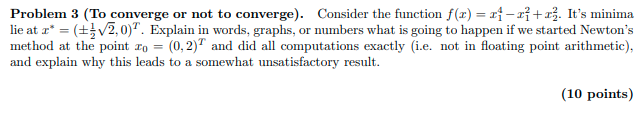






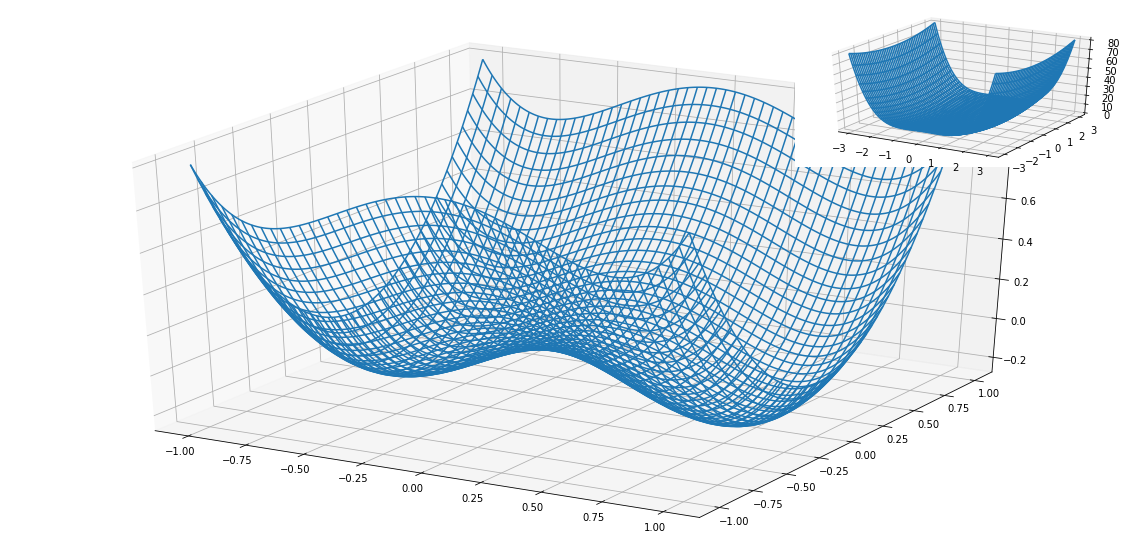

In [41]:
def fx (x1,x2):
    return x1**4-x1**2+x2**2

x=np.linspace(-1,1,800)
z=np.linspace(-1,1,800)

x2=np.linspace(-3,3,800)
z2=np.linspace(-3,3,800)

X,Y = np.meshgrid(x,z)

X2,Y2 = np.meshgrid(x2,z2)



Z= fx(X,Y)
Z2= fx(X2,Y2)
fig =plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')
ax2 = fig.add_subplot(333, projection = '3d')





cp = ax.plot_wireframe(X, Y, Z)

cp = ax2.plot_wireframe(X2, Y2, Z2)




If we start at (0,2), and use newtons method, we will follow the gradient into a point that has gradient equal to zero but it is not the minima.

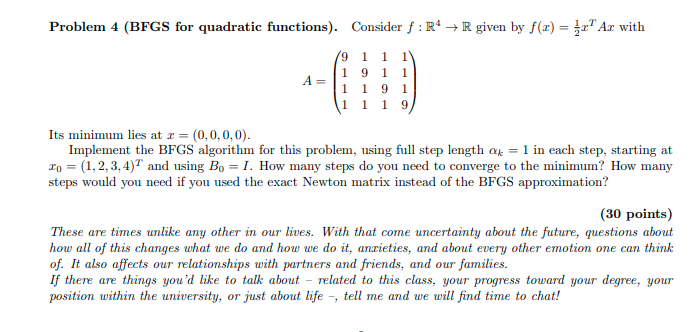

In [240]:


A= np.array([9,1,1,1,1,9,1,1,1,1,9,1,1,1,1,9])
A=A.reshape(4,4)

def f(x):
    return (1/2*x.dot(A.dot(np.transpose(x))))

def gradf(x):
    return A.dot(x)
def grad2f(x):
    return A
def bfgs1(x1,x2,x3,x4):
    xk=np.array([[x1],[x2],[x3],[x4]])
    hk=np.identity(4)
    for i in range(700):
        pk=-hk.dot(gradf(xk))
        alphak=1
        new_xk= xk+ alphak*pk
        if(np.linalg.norm(gradf(xk))<0.0001):
            return print('Xk=',xk,'it took Iterations',i)
        
        
       
        sk=alphak*pk
        yk=gradf(new_xk)-gradf(xk)
        
        rhok=1/(np.transpose(yk).dot(sk))
        
        h1=np.identity(4)-rhok*sk.dot(np.transpose(yk))
        h2=np.identity(4)-rhok*yk.dot(np.transpose(sk))                            
        hk=h1.dot(hk.dot(h2))+rhok*sk.dot(np.transpose(sk))
        
        xk=new_xk
        
        
    return xk



def newton1(x1,x2,x3,x4):
    xk=np.array([[x1],[x2],[x3],[x4]])
    for i in range(100):
        pk=-(np.linalg.inv(grad2f(xk))).dot(gradf(xk))
        
        alphak=1
        if(np.linalg.norm(gradf(xk))<0.0001):
            return print('Xk=',xk,'it took Iterations',i)
        
        xk=xk+pk
       
        
    
    
    









In [237]:
newton1(1,2,3,4)

Xk= [[-4.4408921e-16]
 [-4.4408921e-16]
 [ 4.4408921e-16]
 [ 8.8817842e-16]] it took Iterations 0


In [238]:
bfgs1(1,2,3,4)

Xk= [[7.53243125e-08]
 [9.23465346e-08]
 [1.09368614e-07]
 [1.26390407e-07]] it took Iterations 5


The newtons method takes 1 iteration to achieve a gradient of less than 0.0001 while the bfgs is taking 6 iterations.